In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Classification tree

In [2]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
feature_names = load_iris().feature_names
class_names = load_iris().target_names

In [3]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5, min_samples_split=50, min_samples_leaf=50, 
                             random_state=0, max_leaf_nodes=10)

In [4]:
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(model, feature_names=None, class_names=None, proportion=False):
    dot = export_graphviz(model, feature_names=feature_names, class_names=class_names, node_ids=True, proportion=proportion,
                          filled=True)
    graph = pydot.graph_from_dot_data(dot)[0]
    image = graph.create_png()
    return Image(image)

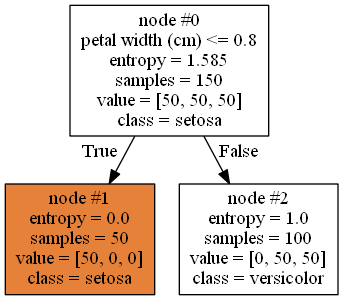

In [5]:
tree = clf.fit(X, y)
draw_decision_tree(tree, feature_names, class_names)

In [6]:
from sklearn.model_selection import cross_val_score

res = cross_val_score(clf, X, y, cv=5)
res.mean()

0.6599999999999999

In [7]:
from sklearn.metrics import confusion_matrix

cf_iris = pd.DataFrame(confusion_matrix(y, tree.predict(X)), index=class_names, columns=class_names)
cf_iris

setosa  versicolor  virginica
setosa          50           0          0
versicolor       0          50          0
virginica        0          50          0

- row: true value
- column: predicted value

In [8]:
importances = pd.Series(tree.feature_importances_, index=feature_names)
importances

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     1.0
dtype: float64

## Hyperparameter Optimization

### Grid Search

In [9]:
from sklearn.model_selection import GridSearchCV

hyperparamters = {'max_depth':list(range(2, 10)), 'max_leaf_nodes':list(range(10,20)), 'min_samples_leaf':list([40,50,60]),
                  'min_samples_split':list([40,50,60])}
GridCV = GridSearchCV(estimator=tree, param_grid=hyperparamters, cv=5) 
GridCV.fit(X,y)
GridCV.best_params_

{'max_depth': 2,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 40,
 'min_samples_split': 40}

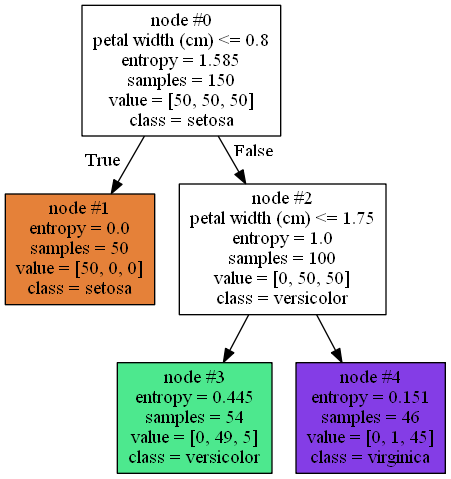

In [10]:
clf_tuning = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=2, min_samples_split=10, min_samples_leaf=40,
                                    random_state=0, max_leaf_nodes=40)
tree_tuning = clf_tuning.fit(X, y)
draw_decision_tree(tree_tuning, feature_names, class_names)

In [11]:
res_tuning = cross_val_score(clf_tuning, X, y, cv=5)
res_tuning.mean()

0.7666666666666667

### Cost Complexity Pruning

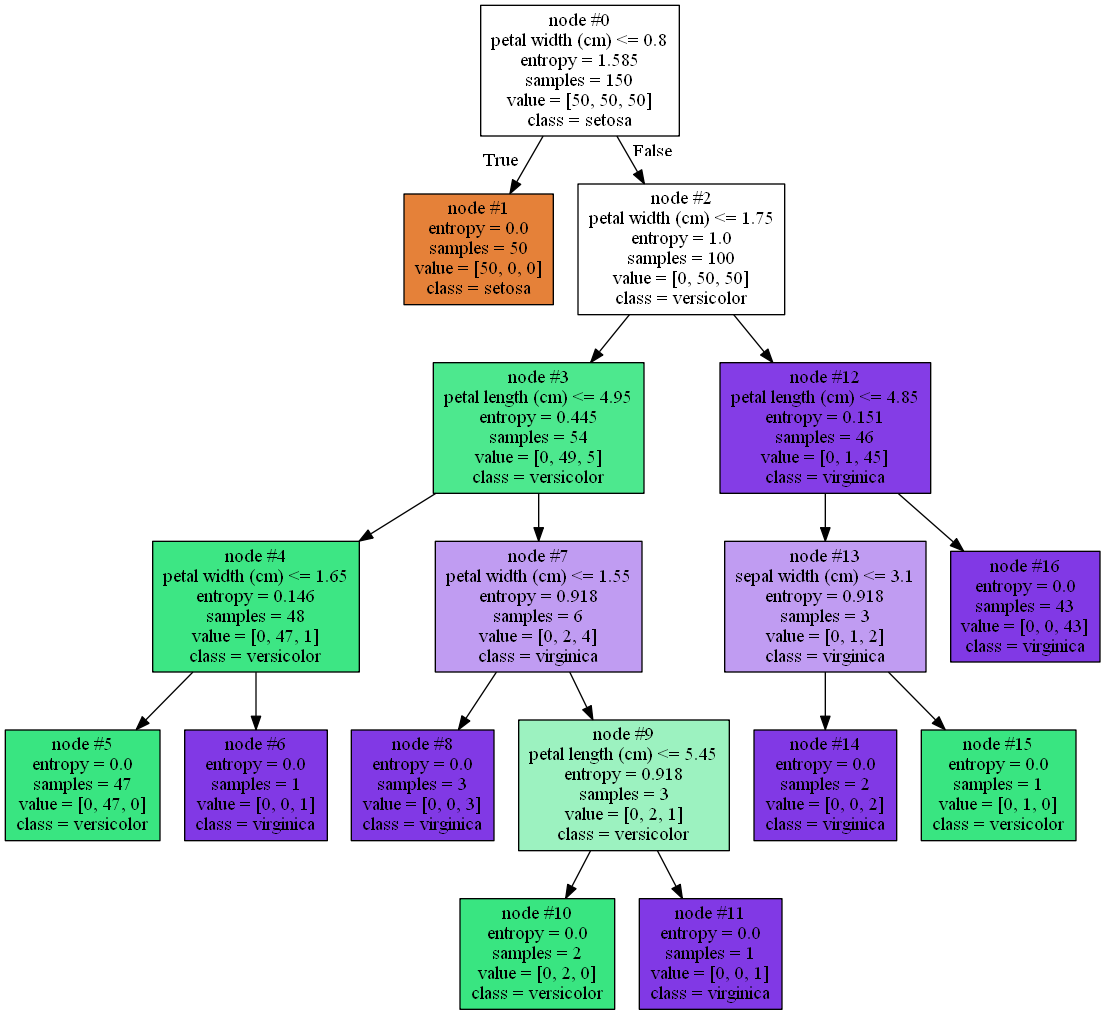

In [12]:
clf_full = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=0)
tree_full = clf_full.fit(X, y)
draw_decision_tree(tree_full, feature_names, class_names)

In [13]:
cc_pruning = clf_full.cost_complexity_pruning_path(X, y)
cc_pruning

{'ccp_alphas': array([0.        , 0.01836592, 0.01836592, 0.02797049, 0.04675016,
        0.07674136, 0.46010691, 0.91829583]),
 'impurities': array([0.        , 0.03673183, 0.05509775, 0.08306824, 0.1298184 ,
        0.20655975, 0.66666667, 1.5849625 ])}

In [14]:
alphas = []
for i in range(len(cc_pruning['ccp_alphas'])-1):
    temp = np.sqrt(cc_pruning['ccp_alphas'][i]*cc_pruning['ccp_alphas'][i+1])
    alphas.append(temp)

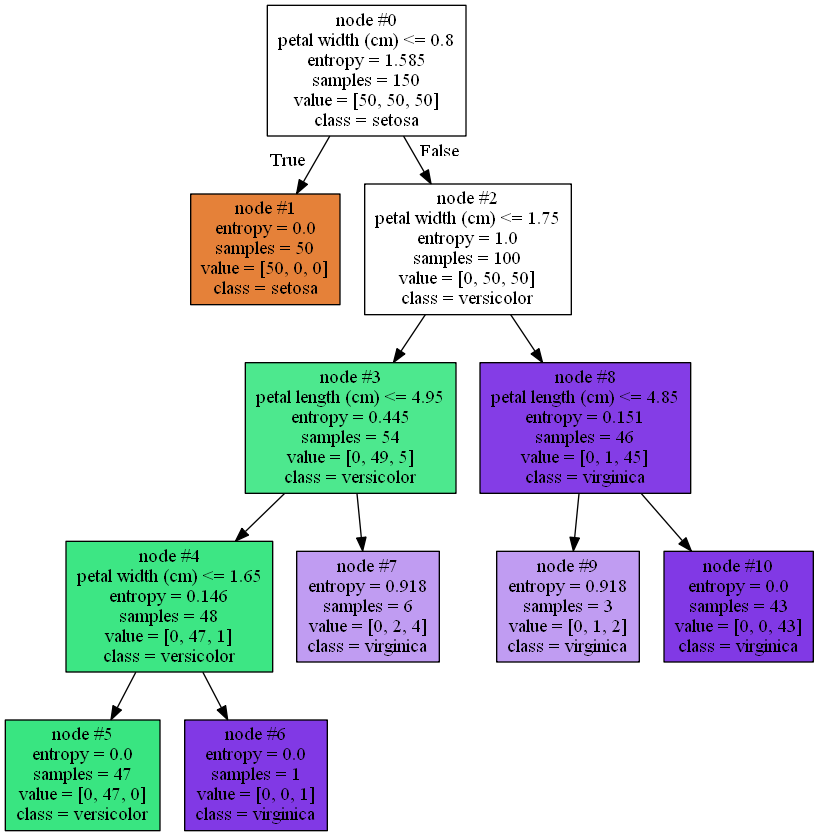

In [15]:
clf_alpha1 = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=0, ccp_alpha=alphas[1])
tree_alpha1 = clf_alpha1.fit(X, y)
draw_decision_tree(tree_alpha1, feature_names, class_names)

In [16]:
accuracy = []

for i in range(len(alphas)):
    clf_alpha = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=0, ccp_alpha=alphas[i])
    res = cross_val_score(clf_alpha, X, y, cv=5)
    accuracy.append(res.mean())

In [17]:
df_cv = pd.DataFrame({'alpha':alphas, 'accuracy':accuracy})
df_cv

alpha  accuracy
0  0.000000  0.953333
1  0.018366  0.953333
2  0.022665  0.953333
3  0.036161  0.960000
4  0.059897  0.946667
5  0.187907  0.933333
6  0.650011  0.666667

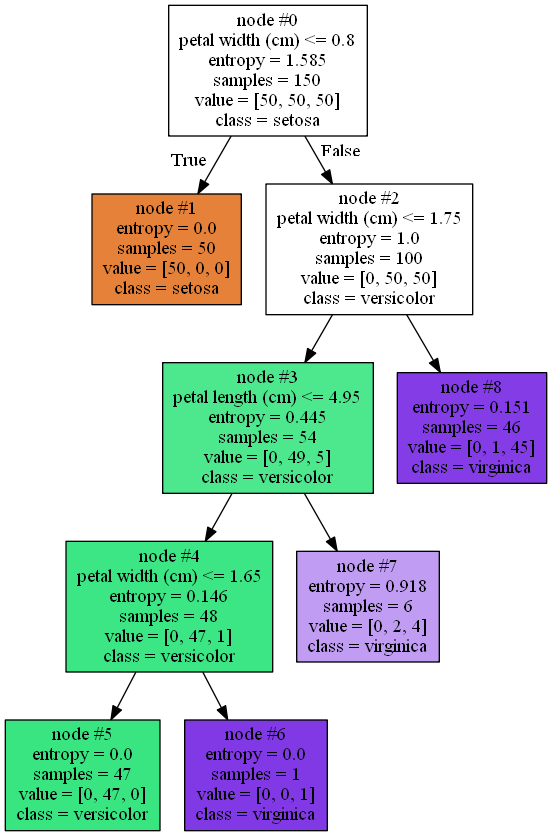

In [18]:
clf_best_alpha = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=0, ccp_alpha=alphas[3])
tree_best_alpha = clf_best_alpha.fit(X, y)
draw_decision_tree(tree_best_alpha, feature_names, class_names)

# Regression Tree

In [19]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
feature_names = load_diabetes().feature_names

In [20]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=2, min_samples_split=50, min_samples_leaf=50, random_state=0, 
                            max_leaf_nodes=10)

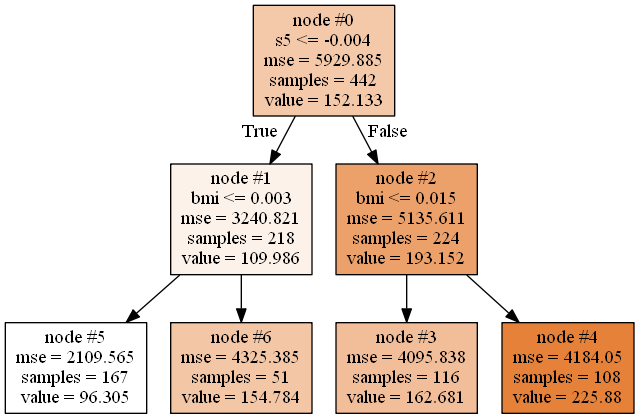

In [21]:
tree = reg.fit(X, y)
draw_decision_tree(tree, feature_names)

In [22]:
res = cross_val_score(reg, X, y, cv=5)
res.mean()

0.31547937764608874

In [23]:
importances = pd.Series(tree.feature_importances_, index=feature_names)
importances

age    0.000000
sex    0.000000
bmi    0.318421
bp     0.000000
s1     0.000000
s2     0.000000
s3     0.000000
s4     0.000000
s5     0.681579
s6     0.000000
dtype: float64

## Hyperparameter Optimization

### Grid Search

In [24]:
hyperparamters = {'max_depth':list(range(2, 10)), 'max_leaf_nodes':list(range(10,20)), 'min_samples_leaf':list([40,50,60]),
                  'min_samples_split':list([40,50,60])}
GridCV = GridSearchCV(estimator=tree, param_grid=hyperparamters, cv=5) 
GridCV.fit(X,y)
GridCV.best_params_

{'max_depth': 3,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 40,
 'min_samples_split': 40}

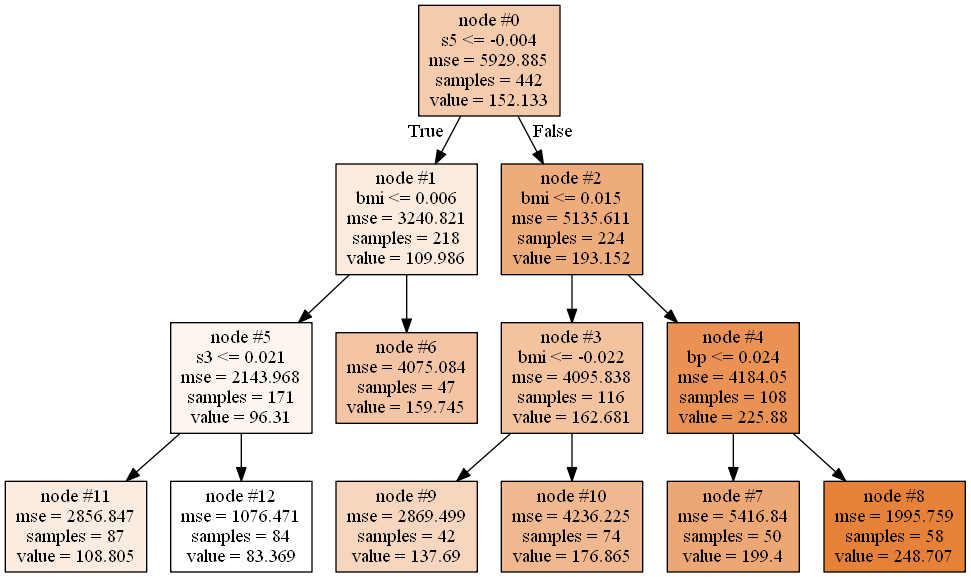

In [25]:
reg_tuning = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=3, min_samples_split=10, min_samples_leaf=40,
                                   random_state=0, max_leaf_nodes=40)
tree_tuning = reg_tuning.fit(X, y)
draw_decision_tree(tree_tuning, feature_names)

In [26]:
res_tuning = cross_val_score(reg_tuning, X, y, cv=5)
res_tuning.mean()

0.3291211749192833

### Cost Complexity Pruning

In [27]:
reg_full = DecisionTreeRegressor(criterion='mse', splitter='best', random_state=0)
reg_full = reg_full.fit(X, y)
draw_decision_tree(reg_full, feature_names)

In [28]:
cc_pruning = reg_full.cost_complexity_pruning_path(X, y)
cc_pruning

{'ccp_alphas': array([0.00000000e+00, 1.13122172e-03, 1.13122172e-03, 1.13122172e-03,
        1.13122172e-03, 1.13122172e-03, 1.13122172e-03, 1.13122172e-03,
        1.13122172e-03, 1.13122172e-03, 1.13122172e-03, 1.50829563e-03,
        3.39366516e-03, 3.39366516e-03, 4.52488688e-03, 4.52488688e-03,
        4.52488688e-03, 4.52488688e-03, 4.52488688e-03, 4.52488688e-03,
        4.52488688e-03, 4.52488688e-03, 4.52488688e-03, 4.52488688e-03,
        4.52488688e-03, 4.52488688e-03, 4.52488688e-03, 6.03318250e-03,
        1.01809955e-02, 1.01809955e-02, 1.01809955e-02, 1.01809955e-02,
        1.01809955e-02, 1.01809955e-02, 1.01809955e-02, 1.01809955e-02,
        1.01809955e-02, 1.01809955e-02, 1.01809955e-02, 1.20663650e-02,
        1.35746606e-02, 1.80995475e-02, 1.80995475e-02, 1.80995475e-02,
        1.80995475e-02, 1.80995475e-02, 1.80995475e-02, 1.80995475e-02,
        1.80995475e-02, 1.80995475e-02, 2.41327300e-02, 2.82805430e-02,
        2.82805430e-02, 2.82805430e-02, 2.82805430

In [29]:
R_squared = []

for i in range(len(cc_pruning['ccp_alphas'])):
    reg_alpha = DecisionTreeRegressor(criterion='mse', splitter='best', random_state=0, ccp_alpha=cc_pruning['ccp_alphas'][i])
    res = cross_val_score(reg_alpha, X, y, cv=5)
    R_squared.append(res.mean())

In [30]:
df_cv = pd.DataFrame({'alpha':cc_pruning['ccp_alphas'], 'R_squared':R_squared})
df_cv.sort_values(by=['R_squared'], ascending=False)

alpha  R_squared
389  120.424108   0.335454
390  181.816955   0.318708
388   93.026184   0.296462
391  335.636763   0.286854
387   84.080653   0.284875
..          ...        ...
180    0.543552  -0.098707
202    0.886878  -0.099225
203    0.886878  -0.099225
204    0.886878  -0.099225
205    0.897624  -0.099225

[394 rows x 2 columns]

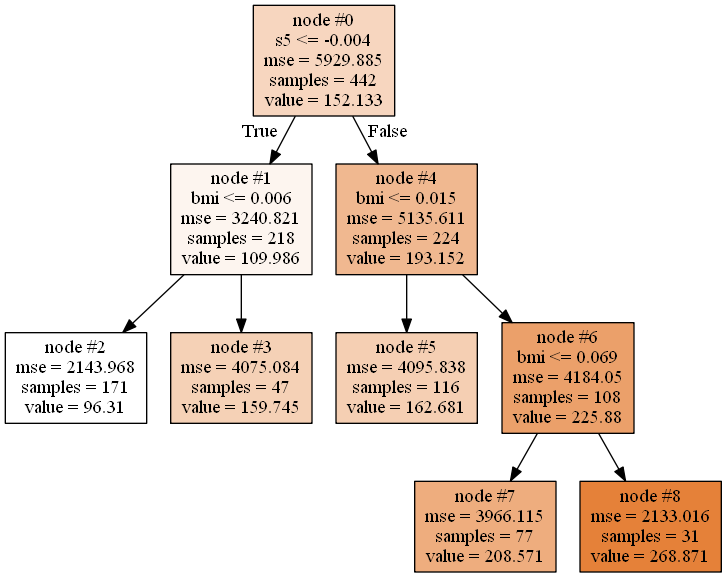

In [31]:
reg_best_alpha = DecisionTreeRegressor(criterion='mse', splitter='best', random_state=0, ccp_alpha=120.424108)
tree_best_alpha = reg_best_alpha.fit(X, y)
draw_decision_tree(tree_best_alpha, feature_names)